Libraries

In [134]:
import numpy as np
from keras import models, layers, optimizers
import re
import matplotlib.pyplot as plt
import os
import cv2
import random
from keras.preprocessing.image import ImageDataGenerator

Preprocess data

In [135]:
batch_size = 8

def generate_data(input_directory, output_directory, batch_size):
    
    input_img_name = "/Frame_144p_" #TODO find a better way to get sample images name
    output_img_name = "/Frame_720p_" #TODO find a better way to get target images name
    sample_size = len(os.listdir(input_directory))-1
    
    while True:
        image_batch = np.zeros((batch_size,144, 256, 3))#TODO change array size
        image_label = np.zeros((batch_size,720, 1280, 3))#TODO change array size
        
        for b in range(batch_size):
            
            selection = random.randint(0,sample_size)
            
            sample = input_directory+input_img_name+str(selection)+".png"
            target = output_directory+output_img_name+str(selection)+".png"

            image = cv2.imread(sample)
                
            #image = image[:,:, 1]
            image = image/255
            
            target_image = cv2.imread(target)
            #target_image = target_image[:,:, 1]
            target_image = target_image/255

            image_batch[b,:,:,:]  = image
            image_label[b,:,:,:] = target_image
        
        images_tuple = (np.array(image_batch),np.array(image_label))
        yield images_tuple
                           

In [136]:
images = generate_data("./Dataset/144p","./Dataset/720p",batch_size)
print(next(images)[0].shape)


(8, 144, 256, 3)


In [98]:
sample_size = len(os.listdir("./Dataset/720p"))

for i in range(29000,sample_size):

    sample ="./Dataset/720p/Frame_720p_"+str(i)+".png"

    image = cv2.imread(sample)
    print(sample)

    image = image[:,:, 1]

./Dataset/720p/Frame_720p_29000.png
./Dataset/720p/Frame_720p_29001.png
./Dataset/720p/Frame_720p_29002.png
./Dataset/720p/Frame_720p_29003.png
./Dataset/720p/Frame_720p_29004.png
./Dataset/720p/Frame_720p_29005.png
./Dataset/720p/Frame_720p_29006.png
./Dataset/720p/Frame_720p_29007.png
./Dataset/720p/Frame_720p_29008.png
./Dataset/720p/Frame_720p_29009.png
./Dataset/720p/Frame_720p_29010.png
./Dataset/720p/Frame_720p_29011.png
./Dataset/720p/Frame_720p_29012.png
./Dataset/720p/Frame_720p_29013.png
./Dataset/720p/Frame_720p_29014.png
./Dataset/720p/Frame_720p_29015.png
./Dataset/720p/Frame_720p_29016.png
./Dataset/720p/Frame_720p_29017.png
./Dataset/720p/Frame_720p_29018.png
./Dataset/720p/Frame_720p_29019.png
./Dataset/720p/Frame_720p_29020.png
./Dataset/720p/Frame_720p_29021.png
./Dataset/720p/Frame_720p_29022.png
./Dataset/720p/Frame_720p_29023.png
./Dataset/720p/Frame_720p_29024.png
./Dataset/720p/Frame_720p_29025.png
./Dataset/720p/Frame_720p_29026.png
./Dataset/720p/Frame_720p_29

./Dataset/720p/Frame_720p_29230.png
./Dataset/720p/Frame_720p_29231.png
./Dataset/720p/Frame_720p_29232.png
./Dataset/720p/Frame_720p_29233.png
./Dataset/720p/Frame_720p_29234.png
./Dataset/720p/Frame_720p_29235.png
./Dataset/720p/Frame_720p_29236.png
./Dataset/720p/Frame_720p_29237.png
./Dataset/720p/Frame_720p_29238.png
./Dataset/720p/Frame_720p_29239.png
./Dataset/720p/Frame_720p_29240.png
./Dataset/720p/Frame_720p_29241.png
./Dataset/720p/Frame_720p_29242.png
./Dataset/720p/Frame_720p_29243.png
./Dataset/720p/Frame_720p_29244.png
./Dataset/720p/Frame_720p_29245.png
./Dataset/720p/Frame_720p_29246.png
./Dataset/720p/Frame_720p_29247.png
./Dataset/720p/Frame_720p_29248.png
./Dataset/720p/Frame_720p_29249.png
./Dataset/720p/Frame_720p_29250.png
./Dataset/720p/Frame_720p_29251.png
./Dataset/720p/Frame_720p_29252.png
./Dataset/720p/Frame_720p_29253.png
./Dataset/720p/Frame_720p_29254.png
./Dataset/720p/Frame_720p_29255.png
./Dataset/720p/Frame_720p_29256.png
./Dataset/720p/Frame_720p_29

./Dataset/720p/Frame_720p_29463.png
./Dataset/720p/Frame_720p_29464.png
./Dataset/720p/Frame_720p_29465.png
./Dataset/720p/Frame_720p_29466.png
./Dataset/720p/Frame_720p_29467.png
./Dataset/720p/Frame_720p_29468.png
./Dataset/720p/Frame_720p_29469.png
./Dataset/720p/Frame_720p_29470.png
./Dataset/720p/Frame_720p_29471.png
./Dataset/720p/Frame_720p_29472.png
./Dataset/720p/Frame_720p_29473.png
./Dataset/720p/Frame_720p_29474.png
./Dataset/720p/Frame_720p_29475.png
./Dataset/720p/Frame_720p_29476.png
./Dataset/720p/Frame_720p_29477.png
./Dataset/720p/Frame_720p_29478.png
./Dataset/720p/Frame_720p_29479.png
./Dataset/720p/Frame_720p_29480.png
./Dataset/720p/Frame_720p_29481.png
./Dataset/720p/Frame_720p_29482.png
./Dataset/720p/Frame_720p_29483.png
./Dataset/720p/Frame_720p_29484.png
./Dataset/720p/Frame_720p_29485.png
./Dataset/720p/Frame_720p_29486.png
./Dataset/720p/Frame_720p_29487.png
./Dataset/720p/Frame_720p_29488.png
./Dataset/720p/Frame_720p_29489.png
./Dataset/720p/Frame_720p_29

./Dataset/720p/Frame_720p_29692.png
./Dataset/720p/Frame_720p_29693.png
./Dataset/720p/Frame_720p_29694.png
./Dataset/720p/Frame_720p_29695.png
./Dataset/720p/Frame_720p_29696.png
./Dataset/720p/Frame_720p_29697.png
./Dataset/720p/Frame_720p_29698.png
./Dataset/720p/Frame_720p_29699.png
./Dataset/720p/Frame_720p_29700.png
./Dataset/720p/Frame_720p_29701.png
./Dataset/720p/Frame_720p_29702.png
./Dataset/720p/Frame_720p_29703.png
./Dataset/720p/Frame_720p_29704.png
./Dataset/720p/Frame_720p_29705.png
./Dataset/720p/Frame_720p_29706.png
./Dataset/720p/Frame_720p_29707.png
./Dataset/720p/Frame_720p_29708.png
./Dataset/720p/Frame_720p_29709.png
./Dataset/720p/Frame_720p_29710.png
./Dataset/720p/Frame_720p_29711.png
./Dataset/720p/Frame_720p_29712.png
./Dataset/720p/Frame_720p_29713.png
./Dataset/720p/Frame_720p_29714.png
./Dataset/720p/Frame_720p_29715.png
./Dataset/720p/Frame_720p_29716.png
./Dataset/720p/Frame_720p_29717.png
./Dataset/720p/Frame_720p_29718.png
./Dataset/720p/Frame_720p_29

./Dataset/720p/Frame_720p_29921.png
./Dataset/720p/Frame_720p_29922.png
./Dataset/720p/Frame_720p_29923.png
./Dataset/720p/Frame_720p_29924.png
./Dataset/720p/Frame_720p_29925.png
./Dataset/720p/Frame_720p_29926.png
./Dataset/720p/Frame_720p_29927.png
./Dataset/720p/Frame_720p_29928.png
./Dataset/720p/Frame_720p_29929.png
./Dataset/720p/Frame_720p_29930.png
./Dataset/720p/Frame_720p_29931.png
./Dataset/720p/Frame_720p_29932.png
./Dataset/720p/Frame_720p_29933.png
./Dataset/720p/Frame_720p_29934.png
./Dataset/720p/Frame_720p_29935.png
./Dataset/720p/Frame_720p_29936.png
./Dataset/720p/Frame_720p_29937.png
./Dataset/720p/Frame_720p_29938.png
./Dataset/720p/Frame_720p_29939.png
./Dataset/720p/Frame_720p_29940.png
./Dataset/720p/Frame_720p_29941.png
./Dataset/720p/Frame_720p_29942.png
./Dataset/720p/Frame_720p_29943.png
./Dataset/720p/Frame_720p_29944.png
./Dataset/720p/Frame_720p_29945.png
./Dataset/720p/Frame_720p_29946.png
./Dataset/720p/Frame_720p_29947.png
./Dataset/720p/Frame_720p_29

./Dataset/720p/Frame_720p_30150.png
./Dataset/720p/Frame_720p_30151.png
./Dataset/720p/Frame_720p_30152.png
./Dataset/720p/Frame_720p_30153.png
./Dataset/720p/Frame_720p_30154.png
./Dataset/720p/Frame_720p_30155.png
./Dataset/720p/Frame_720p_30156.png
./Dataset/720p/Frame_720p_30157.png
./Dataset/720p/Frame_720p_30158.png
./Dataset/720p/Frame_720p_30159.png
./Dataset/720p/Frame_720p_30160.png
./Dataset/720p/Frame_720p_30161.png
./Dataset/720p/Frame_720p_30162.png
./Dataset/720p/Frame_720p_30163.png
./Dataset/720p/Frame_720p_30164.png
./Dataset/720p/Frame_720p_30165.png
./Dataset/720p/Frame_720p_30166.png
./Dataset/720p/Frame_720p_30167.png
./Dataset/720p/Frame_720p_30168.png
./Dataset/720p/Frame_720p_30169.png
./Dataset/720p/Frame_720p_30170.png
./Dataset/720p/Frame_720p_30171.png
./Dataset/720p/Frame_720p_30172.png
./Dataset/720p/Frame_720p_30173.png
./Dataset/720p/Frame_720p_30174.png
./Dataset/720p/Frame_720p_30175.png
./Dataset/720p/Frame_720p_30176.png
./Dataset/720p/Frame_720p_30

./Dataset/720p/Frame_720p_30381.png
./Dataset/720p/Frame_720p_30382.png
./Dataset/720p/Frame_720p_30383.png
./Dataset/720p/Frame_720p_30384.png
./Dataset/720p/Frame_720p_30385.png
./Dataset/720p/Frame_720p_30386.png
./Dataset/720p/Frame_720p_30387.png
./Dataset/720p/Frame_720p_30388.png
./Dataset/720p/Frame_720p_30389.png
./Dataset/720p/Frame_720p_30390.png
./Dataset/720p/Frame_720p_30391.png
./Dataset/720p/Frame_720p_30392.png
./Dataset/720p/Frame_720p_30393.png
./Dataset/720p/Frame_720p_30394.png
./Dataset/720p/Frame_720p_30395.png
./Dataset/720p/Frame_720p_30396.png
./Dataset/720p/Frame_720p_30397.png
./Dataset/720p/Frame_720p_30398.png
./Dataset/720p/Frame_720p_30399.png
./Dataset/720p/Frame_720p_30400.png
./Dataset/720p/Frame_720p_30401.png
./Dataset/720p/Frame_720p_30402.png
./Dataset/720p/Frame_720p_30403.png
./Dataset/720p/Frame_720p_30404.png
./Dataset/720p/Frame_720p_30405.png
./Dataset/720p/Frame_720p_30406.png
./Dataset/720p/Frame_720p_30407.png
./Dataset/720p/Frame_720p_30

./Dataset/720p/Frame_720p_30615.png
./Dataset/720p/Frame_720p_30616.png
./Dataset/720p/Frame_720p_30617.png
./Dataset/720p/Frame_720p_30618.png
./Dataset/720p/Frame_720p_30619.png
./Dataset/720p/Frame_720p_30620.png
./Dataset/720p/Frame_720p_30621.png
./Dataset/720p/Frame_720p_30622.png
./Dataset/720p/Frame_720p_30623.png
./Dataset/720p/Frame_720p_30624.png
./Dataset/720p/Frame_720p_30625.png
./Dataset/720p/Frame_720p_30626.png
./Dataset/720p/Frame_720p_30627.png
./Dataset/720p/Frame_720p_30628.png
./Dataset/720p/Frame_720p_30629.png
./Dataset/720p/Frame_720p_30630.png
./Dataset/720p/Frame_720p_30631.png
./Dataset/720p/Frame_720p_30632.png
./Dataset/720p/Frame_720p_30633.png
./Dataset/720p/Frame_720p_30634.png
./Dataset/720p/Frame_720p_30635.png
./Dataset/720p/Frame_720p_30636.png
./Dataset/720p/Frame_720p_30637.png
./Dataset/720p/Frame_720p_30638.png
./Dataset/720p/Frame_720p_30639.png
./Dataset/720p/Frame_720p_30640.png
./Dataset/720p/Frame_720p_30641.png
./Dataset/720p/Frame_720p_30

./Dataset/720p/Frame_720p_30843.png
./Dataset/720p/Frame_720p_30844.png
./Dataset/720p/Frame_720p_30845.png
./Dataset/720p/Frame_720p_30846.png
./Dataset/720p/Frame_720p_30847.png
./Dataset/720p/Frame_720p_30848.png
./Dataset/720p/Frame_720p_30849.png
./Dataset/720p/Frame_720p_30850.png
./Dataset/720p/Frame_720p_30851.png
./Dataset/720p/Frame_720p_30852.png
./Dataset/720p/Frame_720p_30853.png
./Dataset/720p/Frame_720p_30854.png
./Dataset/720p/Frame_720p_30855.png
./Dataset/720p/Frame_720p_30856.png
./Dataset/720p/Frame_720p_30857.png
./Dataset/720p/Frame_720p_30858.png
./Dataset/720p/Frame_720p_30859.png
./Dataset/720p/Frame_720p_30860.png
./Dataset/720p/Frame_720p_30861.png
./Dataset/720p/Frame_720p_30862.png
./Dataset/720p/Frame_720p_30863.png
./Dataset/720p/Frame_720p_30864.png
./Dataset/720p/Frame_720p_30865.png
./Dataset/720p/Frame_720p_30866.png
./Dataset/720p/Frame_720p_30867.png
./Dataset/720p/Frame_720p_30868.png
./Dataset/720p/Frame_720p_30869.png
./Dataset/720p/Frame_720p_30

./Dataset/720p/Frame_720p_31075.png
./Dataset/720p/Frame_720p_31076.png
./Dataset/720p/Frame_720p_31077.png
./Dataset/720p/Frame_720p_31078.png
./Dataset/720p/Frame_720p_31079.png
./Dataset/720p/Frame_720p_31080.png
./Dataset/720p/Frame_720p_31081.png
./Dataset/720p/Frame_720p_31082.png
./Dataset/720p/Frame_720p_31083.png
./Dataset/720p/Frame_720p_31084.png
./Dataset/720p/Frame_720p_31085.png
./Dataset/720p/Frame_720p_31086.png
./Dataset/720p/Frame_720p_31087.png
./Dataset/720p/Frame_720p_31088.png
./Dataset/720p/Frame_720p_31089.png
./Dataset/720p/Frame_720p_31090.png
./Dataset/720p/Frame_720p_31091.png
./Dataset/720p/Frame_720p_31092.png
./Dataset/720p/Frame_720p_31093.png
./Dataset/720p/Frame_720p_31094.png
./Dataset/720p/Frame_720p_31095.png
./Dataset/720p/Frame_720p_31096.png
./Dataset/720p/Frame_720p_31097.png
./Dataset/720p/Frame_720p_31098.png
./Dataset/720p/Frame_720p_31099.png
./Dataset/720p/Frame_720p_31100.png
./Dataset/720p/Frame_720p_31101.png
./Dataset/720p/Frame_720p_31

./Dataset/720p/Frame_720p_31308.png
./Dataset/720p/Frame_720p_31309.png
./Dataset/720p/Frame_720p_31310.png
./Dataset/720p/Frame_720p_31311.png
./Dataset/720p/Frame_720p_31312.png
./Dataset/720p/Frame_720p_31313.png
./Dataset/720p/Frame_720p_31314.png
./Dataset/720p/Frame_720p_31315.png
./Dataset/720p/Frame_720p_31316.png
./Dataset/720p/Frame_720p_31317.png
./Dataset/720p/Frame_720p_31318.png
./Dataset/720p/Frame_720p_31319.png
./Dataset/720p/Frame_720p_31320.png
./Dataset/720p/Frame_720p_31321.png
./Dataset/720p/Frame_720p_31322.png
./Dataset/720p/Frame_720p_31323.png
./Dataset/720p/Frame_720p_31324.png
./Dataset/720p/Frame_720p_31325.png
./Dataset/720p/Frame_720p_31326.png
./Dataset/720p/Frame_720p_31327.png
./Dataset/720p/Frame_720p_31328.png
./Dataset/720p/Frame_720p_31329.png
./Dataset/720p/Frame_720p_31330.png
./Dataset/720p/Frame_720p_31331.png
./Dataset/720p/Frame_720p_31332.png
./Dataset/720p/Frame_720p_31333.png
./Dataset/720p/Frame_720p_31334.png
./Dataset/720p/Frame_720p_31

./Dataset/720p/Frame_720p_31538.png
./Dataset/720p/Frame_720p_31539.png
./Dataset/720p/Frame_720p_31540.png
./Dataset/720p/Frame_720p_31541.png
./Dataset/720p/Frame_720p_31542.png
./Dataset/720p/Frame_720p_31543.png
./Dataset/720p/Frame_720p_31544.png
./Dataset/720p/Frame_720p_31545.png
./Dataset/720p/Frame_720p_31546.png
./Dataset/720p/Frame_720p_31547.png
./Dataset/720p/Frame_720p_31548.png
./Dataset/720p/Frame_720p_31549.png
./Dataset/720p/Frame_720p_31550.png
./Dataset/720p/Frame_720p_31551.png
./Dataset/720p/Frame_720p_31552.png
./Dataset/720p/Frame_720p_31553.png
./Dataset/720p/Frame_720p_31554.png
./Dataset/720p/Frame_720p_31555.png
./Dataset/720p/Frame_720p_31556.png
./Dataset/720p/Frame_720p_31557.png
./Dataset/720p/Frame_720p_31558.png
./Dataset/720p/Frame_720p_31559.png
./Dataset/720p/Frame_720p_31560.png
./Dataset/720p/Frame_720p_31561.png
./Dataset/720p/Frame_720p_31562.png
./Dataset/720p/Frame_720p_31563.png
./Dataset/720p/Frame_720p_31564.png
./Dataset/720p/Frame_720p_31

./Dataset/720p/Frame_720p_31768.png
./Dataset/720p/Frame_720p_31769.png
./Dataset/720p/Frame_720p_31770.png
./Dataset/720p/Frame_720p_31771.png
./Dataset/720p/Frame_720p_31772.png
./Dataset/720p/Frame_720p_31773.png
./Dataset/720p/Frame_720p_31774.png
./Dataset/720p/Frame_720p_31775.png
./Dataset/720p/Frame_720p_31776.png
./Dataset/720p/Frame_720p_31777.png
./Dataset/720p/Frame_720p_31778.png
./Dataset/720p/Frame_720p_31779.png
./Dataset/720p/Frame_720p_31780.png
./Dataset/720p/Frame_720p_31781.png
./Dataset/720p/Frame_720p_31782.png
./Dataset/720p/Frame_720p_31783.png
./Dataset/720p/Frame_720p_31784.png
./Dataset/720p/Frame_720p_31785.png
./Dataset/720p/Frame_720p_31786.png
./Dataset/720p/Frame_720p_31787.png
./Dataset/720p/Frame_720p_31788.png
./Dataset/720p/Frame_720p_31789.png
./Dataset/720p/Frame_720p_31790.png
./Dataset/720p/Frame_720p_31791.png
./Dataset/720p/Frame_720p_31792.png
./Dataset/720p/Frame_720p_31793.png
./Dataset/720p/Frame_720p_31794.png
./Dataset/720p/Frame_720p_31

./Dataset/720p/Frame_720p_32001.png
./Dataset/720p/Frame_720p_32002.png
./Dataset/720p/Frame_720p_32003.png
./Dataset/720p/Frame_720p_32004.png
./Dataset/720p/Frame_720p_32005.png
./Dataset/720p/Frame_720p_32006.png
./Dataset/720p/Frame_720p_32007.png
./Dataset/720p/Frame_720p_32008.png
./Dataset/720p/Frame_720p_32009.png
./Dataset/720p/Frame_720p_32010.png
./Dataset/720p/Frame_720p_32011.png
./Dataset/720p/Frame_720p_32012.png
./Dataset/720p/Frame_720p_32013.png
./Dataset/720p/Frame_720p_32014.png
./Dataset/720p/Frame_720p_32015.png
./Dataset/720p/Frame_720p_32016.png
./Dataset/720p/Frame_720p_32017.png
./Dataset/720p/Frame_720p_32018.png
./Dataset/720p/Frame_720p_32019.png
./Dataset/720p/Frame_720p_32020.png
./Dataset/720p/Frame_720p_32021.png
./Dataset/720p/Frame_720p_32022.png
./Dataset/720p/Frame_720p_32023.png
./Dataset/720p/Frame_720p_32024.png
./Dataset/720p/Frame_720p_32025.png
./Dataset/720p/Frame_720p_32026.png
./Dataset/720p/Frame_720p_32027.png
./Dataset/720p/Frame_720p_32

./Dataset/720p/Frame_720p_32233.png
./Dataset/720p/Frame_720p_32234.png
./Dataset/720p/Frame_720p_32235.png
./Dataset/720p/Frame_720p_32236.png
./Dataset/720p/Frame_720p_32237.png
./Dataset/720p/Frame_720p_32238.png
./Dataset/720p/Frame_720p_32239.png
./Dataset/720p/Frame_720p_32240.png
./Dataset/720p/Frame_720p_32241.png
./Dataset/720p/Frame_720p_32242.png
./Dataset/720p/Frame_720p_32243.png
./Dataset/720p/Frame_720p_32244.png
./Dataset/720p/Frame_720p_32245.png
./Dataset/720p/Frame_720p_32246.png
./Dataset/720p/Frame_720p_32247.png
./Dataset/720p/Frame_720p_32248.png
./Dataset/720p/Frame_720p_32249.png
./Dataset/720p/Frame_720p_32250.png
./Dataset/720p/Frame_720p_32251.png
./Dataset/720p/Frame_720p_32252.png
./Dataset/720p/Frame_720p_32253.png
./Dataset/720p/Frame_720p_32254.png
./Dataset/720p/Frame_720p_32255.png
./Dataset/720p/Frame_720p_32256.png
./Dataset/720p/Frame_720p_32257.png
./Dataset/720p/Frame_720p_32258.png
./Dataset/720p/Frame_720p_32259.png
./Dataset/720p/Frame_720p_32

./Dataset/720p/Frame_720p_32461.png
./Dataset/720p/Frame_720p_32462.png
./Dataset/720p/Frame_720p_32463.png
./Dataset/720p/Frame_720p_32464.png
./Dataset/720p/Frame_720p_32465.png
./Dataset/720p/Frame_720p_32466.png
./Dataset/720p/Frame_720p_32467.png
./Dataset/720p/Frame_720p_32468.png
./Dataset/720p/Frame_720p_32469.png
./Dataset/720p/Frame_720p_32470.png
./Dataset/720p/Frame_720p_32471.png
./Dataset/720p/Frame_720p_32472.png
./Dataset/720p/Frame_720p_32473.png
./Dataset/720p/Frame_720p_32474.png
./Dataset/720p/Frame_720p_32475.png
./Dataset/720p/Frame_720p_32476.png
./Dataset/720p/Frame_720p_32477.png
./Dataset/720p/Frame_720p_32478.png
./Dataset/720p/Frame_720p_32479.png
./Dataset/720p/Frame_720p_32480.png
./Dataset/720p/Frame_720p_32481.png
./Dataset/720p/Frame_720p_32482.png
./Dataset/720p/Frame_720p_32483.png
./Dataset/720p/Frame_720p_32484.png
./Dataset/720p/Frame_720p_32485.png
./Dataset/720p/Frame_720p_32486.png
./Dataset/720p/Frame_720p_32487.png
./Dataset/720p/Frame_720p_32

./Dataset/720p/Frame_720p_32694.png
./Dataset/720p/Frame_720p_32695.png
./Dataset/720p/Frame_720p_32696.png
./Dataset/720p/Frame_720p_32697.png
./Dataset/720p/Frame_720p_32698.png
./Dataset/720p/Frame_720p_32699.png
./Dataset/720p/Frame_720p_32700.png
./Dataset/720p/Frame_720p_32701.png
./Dataset/720p/Frame_720p_32702.png
./Dataset/720p/Frame_720p_32703.png
./Dataset/720p/Frame_720p_32704.png
./Dataset/720p/Frame_720p_32705.png
./Dataset/720p/Frame_720p_32706.png
./Dataset/720p/Frame_720p_32707.png
./Dataset/720p/Frame_720p_32708.png
./Dataset/720p/Frame_720p_32709.png
./Dataset/720p/Frame_720p_32710.png
./Dataset/720p/Frame_720p_32711.png
./Dataset/720p/Frame_720p_32712.png
./Dataset/720p/Frame_720p_32713.png
./Dataset/720p/Frame_720p_32714.png
./Dataset/720p/Frame_720p_32715.png
./Dataset/720p/Frame_720p_32716.png
./Dataset/720p/Frame_720p_32717.png
./Dataset/720p/Frame_720p_32718.png
./Dataset/720p/Frame_720p_32719.png
./Dataset/720p/Frame_720p_32720.png
./Dataset/720p/Frame_720p_32

./Dataset/720p/Frame_720p_32923.png
./Dataset/720p/Frame_720p_32924.png
./Dataset/720p/Frame_720p_32925.png
./Dataset/720p/Frame_720p_32926.png
./Dataset/720p/Frame_720p_32927.png
./Dataset/720p/Frame_720p_32928.png
./Dataset/720p/Frame_720p_32929.png
./Dataset/720p/Frame_720p_32930.png
./Dataset/720p/Frame_720p_32931.png
./Dataset/720p/Frame_720p_32932.png
./Dataset/720p/Frame_720p_32933.png
./Dataset/720p/Frame_720p_32934.png
./Dataset/720p/Frame_720p_32935.png
./Dataset/720p/Frame_720p_32936.png
./Dataset/720p/Frame_720p_32937.png
./Dataset/720p/Frame_720p_32938.png
./Dataset/720p/Frame_720p_32939.png
./Dataset/720p/Frame_720p_32940.png
./Dataset/720p/Frame_720p_32941.png
./Dataset/720p/Frame_720p_32942.png
./Dataset/720p/Frame_720p_32943.png
./Dataset/720p/Frame_720p_32944.png
./Dataset/720p/Frame_720p_32945.png
./Dataset/720p/Frame_720p_32946.png
./Dataset/720p/Frame_720p_32947.png
./Dataset/720p/Frame_720p_32948.png
./Dataset/720p/Frame_720p_32949.png
./Dataset/720p/Frame_720p_32

./Dataset/720p/Frame_720p_33152.png
./Dataset/720p/Frame_720p_33153.png
./Dataset/720p/Frame_720p_33154.png
./Dataset/720p/Frame_720p_33155.png
./Dataset/720p/Frame_720p_33156.png
./Dataset/720p/Frame_720p_33157.png
./Dataset/720p/Frame_720p_33158.png
./Dataset/720p/Frame_720p_33159.png
./Dataset/720p/Frame_720p_33160.png
./Dataset/720p/Frame_720p_33161.png
./Dataset/720p/Frame_720p_33162.png
./Dataset/720p/Frame_720p_33163.png
./Dataset/720p/Frame_720p_33164.png
./Dataset/720p/Frame_720p_33165.png
./Dataset/720p/Frame_720p_33166.png
./Dataset/720p/Frame_720p_33167.png
./Dataset/720p/Frame_720p_33168.png
./Dataset/720p/Frame_720p_33169.png
./Dataset/720p/Frame_720p_33170.png
./Dataset/720p/Frame_720p_33171.png
./Dataset/720p/Frame_720p_33172.png
./Dataset/720p/Frame_720p_33173.png
./Dataset/720p/Frame_720p_33174.png
./Dataset/720p/Frame_720p_33175.png
./Dataset/720p/Frame_720p_33176.png
./Dataset/720p/Frame_720p_33177.png
./Dataset/720p/Frame_720p_33178.png
./Dataset/720p/Frame_720p_33

./Dataset/720p/Frame_720p_33381.png
./Dataset/720p/Frame_720p_33382.png
./Dataset/720p/Frame_720p_33383.png
./Dataset/720p/Frame_720p_33384.png
./Dataset/720p/Frame_720p_33385.png
./Dataset/720p/Frame_720p_33386.png
./Dataset/720p/Frame_720p_33387.png
./Dataset/720p/Frame_720p_33388.png
./Dataset/720p/Frame_720p_33389.png
./Dataset/720p/Frame_720p_33390.png
./Dataset/720p/Frame_720p_33391.png
./Dataset/720p/Frame_720p_33392.png
./Dataset/720p/Frame_720p_33393.png
./Dataset/720p/Frame_720p_33394.png
./Dataset/720p/Frame_720p_33395.png
./Dataset/720p/Frame_720p_33396.png
./Dataset/720p/Frame_720p_33397.png
./Dataset/720p/Frame_720p_33398.png
./Dataset/720p/Frame_720p_33399.png
./Dataset/720p/Frame_720p_33400.png
./Dataset/720p/Frame_720p_33401.png
./Dataset/720p/Frame_720p_33402.png
./Dataset/720p/Frame_720p_33403.png
./Dataset/720p/Frame_720p_33404.png
./Dataset/720p/Frame_720p_33405.png
./Dataset/720p/Frame_720p_33406.png
./Dataset/720p/Frame_720p_33407.png
./Dataset/720p/Frame_720p_33

./Dataset/720p/Frame_720p_33611.png
./Dataset/720p/Frame_720p_33612.png
./Dataset/720p/Frame_720p_33613.png
./Dataset/720p/Frame_720p_33614.png
./Dataset/720p/Frame_720p_33615.png
./Dataset/720p/Frame_720p_33616.png
./Dataset/720p/Frame_720p_33617.png
./Dataset/720p/Frame_720p_33618.png
./Dataset/720p/Frame_720p_33619.png
./Dataset/720p/Frame_720p_33620.png
./Dataset/720p/Frame_720p_33621.png
./Dataset/720p/Frame_720p_33622.png
./Dataset/720p/Frame_720p_33623.png
./Dataset/720p/Frame_720p_33624.png
./Dataset/720p/Frame_720p_33625.png
./Dataset/720p/Frame_720p_33626.png
./Dataset/720p/Frame_720p_33627.png
./Dataset/720p/Frame_720p_33628.png
./Dataset/720p/Frame_720p_33629.png
./Dataset/720p/Frame_720p_33630.png
./Dataset/720p/Frame_720p_33631.png
./Dataset/720p/Frame_720p_33632.png
./Dataset/720p/Frame_720p_33633.png
./Dataset/720p/Frame_720p_33634.png
./Dataset/720p/Frame_720p_33635.png
./Dataset/720p/Frame_720p_33636.png
./Dataset/720p/Frame_720p_33637.png
./Dataset/720p/Frame_720p_33

./Dataset/720p/Frame_720p_33839.png
./Dataset/720p/Frame_720p_33840.png
./Dataset/720p/Frame_720p_33841.png
./Dataset/720p/Frame_720p_33842.png
./Dataset/720p/Frame_720p_33843.png
./Dataset/720p/Frame_720p_33844.png
./Dataset/720p/Frame_720p_33845.png
./Dataset/720p/Frame_720p_33846.png
./Dataset/720p/Frame_720p_33847.png
./Dataset/720p/Frame_720p_33848.png
./Dataset/720p/Frame_720p_33849.png
./Dataset/720p/Frame_720p_33850.png
./Dataset/720p/Frame_720p_33851.png
./Dataset/720p/Frame_720p_33852.png
./Dataset/720p/Frame_720p_33853.png
./Dataset/720p/Frame_720p_33854.png
./Dataset/720p/Frame_720p_33855.png
./Dataset/720p/Frame_720p_33856.png
./Dataset/720p/Frame_720p_33857.png
./Dataset/720p/Frame_720p_33858.png
./Dataset/720p/Frame_720p_33859.png
./Dataset/720p/Frame_720p_33860.png
./Dataset/720p/Frame_720p_33861.png
./Dataset/720p/Frame_720p_33862.png
./Dataset/720p/Frame_720p_33863.png
./Dataset/720p/Frame_720p_33864.png
./Dataset/720p/Frame_720p_33865.png
./Dataset/720p/Frame_720p_33

Model

In [137]:


autoencoder =models.Sequential()

# Encoder Layers
autoencoder.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(144, 256, 3)))
autoencoder.add(layers.MaxPooling2D((2, 2), padding='same'))

#autoencoder.add(layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
#autoencoder.add(layers.MaxPooling2D((2, 2), padding='same'))

#autoencoder.add(layers.Conv2D(8, (3, 3), strides=(2,2), activation='relu', padding='same'))

# Decoder Layers
#autoencoder.add(layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
#autoencoder.add(layers.UpSampling2D((2, 2)))

#autoencoder.add(layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
#autoencoder.add(layers.UpSampling2D((2, 2)))

autoencoder.add(layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(layers.UpSampling2D((2, 2)))

autoencoder.add(layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(layers.UpSampling2D((5, 5)))

autoencoder.add(layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same'))
autoencoder.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
autoencoder.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_138 (Conv2D)          (None, 144, 256, 16)      448       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 72, 128, 16)       0         
_________________________________________________________________
conv2d_139 (Conv2D)          (None, 72, 128, 8)        1160      
_________________________________________________________________
up_sampling2d_76 (UpSampling (None, 144, 256, 8)       0         
_________________________________________________________________
conv2d_140 (Conv2D)          (None, 144, 256, 8)       584       
_________________________________________________________________
up_sampling2d_77 (UpSampling (None, 720, 1280, 8)      0         
_________________________________________________________________
conv2d_141 (Conv2D)          (None, 720, 1280, 3)      219       
Total para

In [159]:
autoencoder =models.Sequential()

# Encoder Layers

autoencoder.add(layers.Conv2D(8, (3, 3), activation='relu', padding='same', input_shape=(144, 256, 3)))
autoencoder.add(layers.UpSampling2D((5, 5)))

autoencoder.add(layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same'))
autoencoder.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_147 (Conv2D)          (None, 144, 256, 8)       224       
_________________________________________________________________
up_sampling2d_81 (UpSampling (None, 720, 1280, 8)      0         
_________________________________________________________________
conv2d_148 (Conv2D)          (None, 720, 1280, 3)      219       
Total params: 443
Trainable params: 443
Non-trainable params: 0
_________________________________________________________________


Training Autoencoders for 5 epochs

In [160]:


num_images = len(os.listdir('./Dataset/144p'))

for i in range(1):
    autoencoder.fit_generator(
        generate_data("./Dataset/144p","./Dataset/720p",batch_size),
        epochs=1,
        steps_per_epoch=num_images// batch_size)


    autoencoder.save_weights("train_"+str(i)+".h5")




Epoch 1/1
4255/4255 [==============================] - 3369s 792ms/step - loss: 0.5337 - acc: 0.0095


Visualizing the reconstructed inputs and the encoded representations using Matplotlib

(720, 1280, 3)


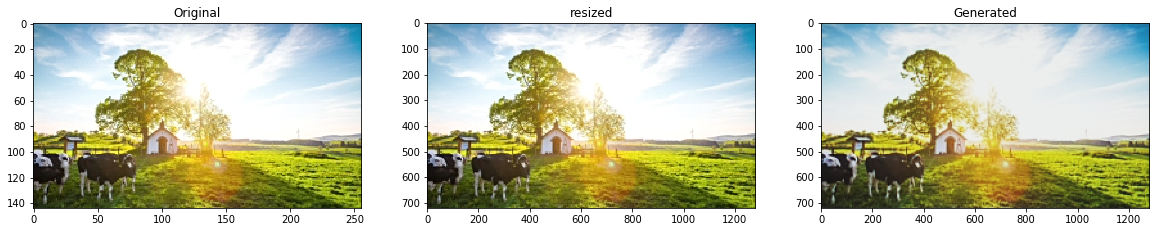

In [162]:
#autoencoder.load_weights("train_5.h5")

f, (original, res,new) = plt.subplots(1, 3, figsize=(20,10))

sample = "prueba2.jpg"
#sample = "./Dataset/144p/Frame_144p_3988.png"
image = cv2.imread(sample)
#image = image[:,:, 1]
original.set_title('Original')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = image/255

original.imshow(image)
plt.imsave("output1_new_network.jpg",image)

dim = (1280, 720)
resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
res.set_title('resized')
res.imshow(resized)
plt.imsave("output2_new_network.jpg",resized)

image_batch = np.zeros((1,144, 256, 3))
image_batch[0,:,:,:] = image

prediction = autoencoder.predict(image_batch)[0,:,:,:]

print(prediction.shape)

plt.imsave("output3_new_network.jpg",prediction)

new.set_title('Generated')
new.imshow(prediction)


In [17]:
print(num_images)

34046
